### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

### Reading the CSV file

In [2]:
# Reading the CSV file
dataset=pd.read_csv(r'uber-raw-data-aug14.csv')
# Checking the size of the dataset
dataset.shape

(829275, 4)

In [3]:
dataset.head(10)

,Date/Time,Lat,Lon,Base
0,08/01/14 0:03,40.7366,-73.9906,B02512
1,08/01/14 0:09,40.7260,-73.9918,B02512
2,08/01/14 0:12,40.7209,-74.0507,B02512
3,08/01/14 0:12,40.7387,-73.9856,B02512
4,08/01/14 0:12,40.7323,-74.0077,B02512
5,08/01/14 0:13,40.7349,-74.0033,B02512
6,08/01/14 0:15,40.7279,-73.9542,B02512
7,08/01/14 0:17,40.7210,-73.9937,B02512
8,08/01/14 0:19,40.7195,-74.0060,B02512
9,08/01/14 0:20,40.7448,-73.9799,B02512


In [4]:
clus = dataset[['Lat','Lon']]

In [5]:
clus.dtypes

Lat    float64
Lon    float64
dtype: object

In [6]:
X=clus.values#to convert it into array   x is matrix of feature

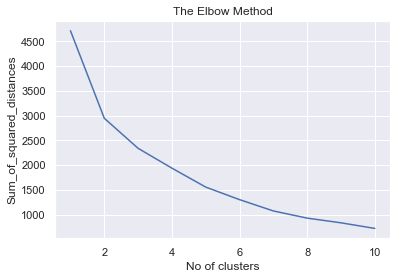

In [7]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter= 300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('Sum_of_squared_distances')
plt.show()#here we can clearly see that the elbow is on k=6

### Performing k-Means Clustering

In [8]:
kmeans=KMeans(n_clusters=6,init='k-means++',max_iter= 300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(X)

### Storing the Cluster Centroids

In [9]:
centroids = kmeans.cluster_centers_

In [10]:
centroids

array([[ 40.68635788, -73.96271781],
       [ 40.73090068, -73.99782155],
       [ 40.79705545, -73.87478166],
       [ 40.66810287, -73.75649511],
       [ 40.69995129, -74.20072696],
       [ 40.76705126, -73.97159848]])

### Visualizing centroids

In [11]:
centroids = pd.DataFrame(centroids)

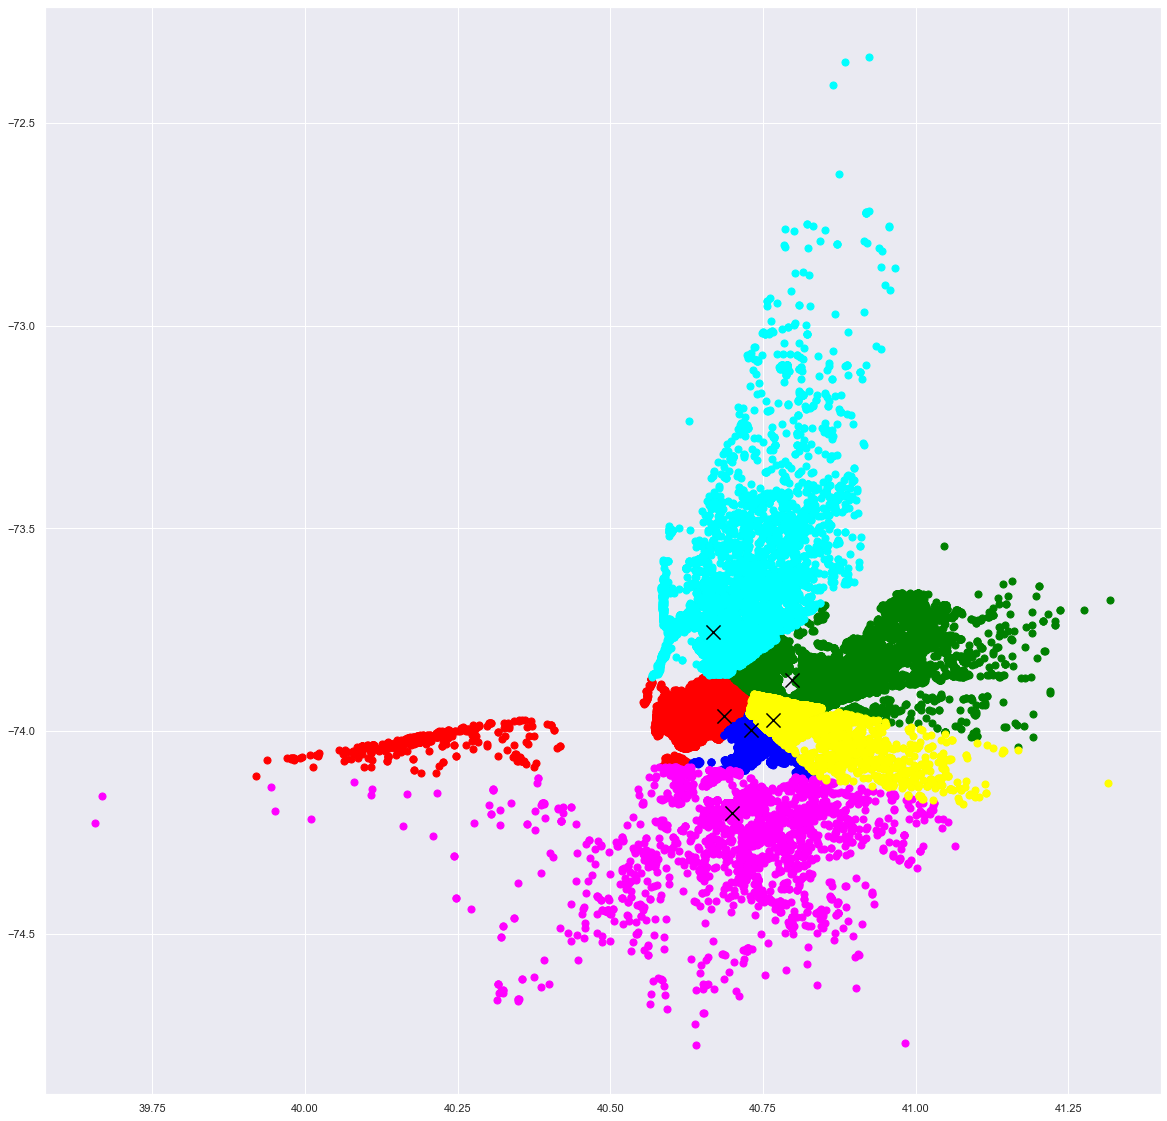

In [12]:
plt.figure(figsize=(20,20))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50,c= 'red')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50,c= 'blue')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50,c = 'green')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'cyan')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'magenta')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 50, c = 'yellow')
plt.scatter(centroids[0],centroids[1],marker = 'x', s = 200, c = 'black')

plt.show()

In [13]:
centroids = centroids.values.tolist()

### Visualizing centroids on Map

In [16]:
import folium

In [17]:
map = folium.Map(location=[40.76714108842865, -73.97152828282472], zoom_start = 11)
for point in range(0, len(centroids)):
    folium.Marker(centroids[point], popup = centroids[point]).add_to(map)
map

#### Storing the clusters and merging the same into original dataset

In [18]:
dataset['Cluster'] = y_kmeans

In [19]:
dataset.head(10)

,Date/Time,Lat,Lon,Base,Cluster
0,08/01/14 0:03,40.7366,-73.9906,B02512,1
1,08/01/14 0:09,40.7260,-73.9918,B02512,1
2,08/01/14 0:12,40.7209,-74.0507,B02512,1
3,08/01/14 0:12,40.7387,-73.9856,B02512,1
4,08/01/14 0:12,40.7323,-74.0077,B02512,1
5,08/01/14 0:13,40.7349,-74.0033,B02512,1
6,08/01/14 0:15,40.7279,-73.9542,B02512,0
7,08/01/14 0:17,40.7210,-73.9937,B02512,1
8,08/01/14 0:19,40.7195,-74.0060,B02512,1
9,08/01/14 0:20,40.7448,-73.9799,B02512,1


### Which cluster receives maximum ride request?

C:\Users\Deepanshu Goyal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


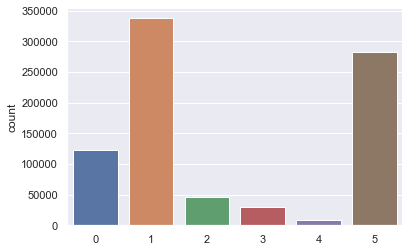

In [20]:
sns.countplot(y_kmeans)
# 1st Cluster recieves the max rides
max_cnt=1

### Prediction on new location

In [21]:
new_location=[(40.6556,-73.5631)]
kmeans.predict(new_location)

array([3])